###Read yankees_df in to make make some EDA

In [0]:
import os
PLOT_DIR = os.path.join("data", "plots")
CSV_DIR = os.path.join("data", "csv")
os.makedirs(PLOT_DIR, exist_ok=True)
os.makedirs(CSV_DIR, exist_ok=True)

In [0]:
yankees = spark.read.parquet("/FileStore/yankees/yankees_df.parquet")

In [0]:
yankees_wl = yankees.select('W/L').groupBy('W/L').count()
yankees_wl = yankees_wl.toPandas().set_index('W/L')
yankees_wl

count 
 
 
 W/L 
 
 
 
 
 
 W-wo 
 11 
 
 
 L 
 59 
 
 
 W 
 75 
 
 
 L-wo 
 9

In [0]:
# save the results to csv
fpath = os.path.join(CSV_DIR, "yankees_wl.csv")
yankees_wl.to_csv(fpath)

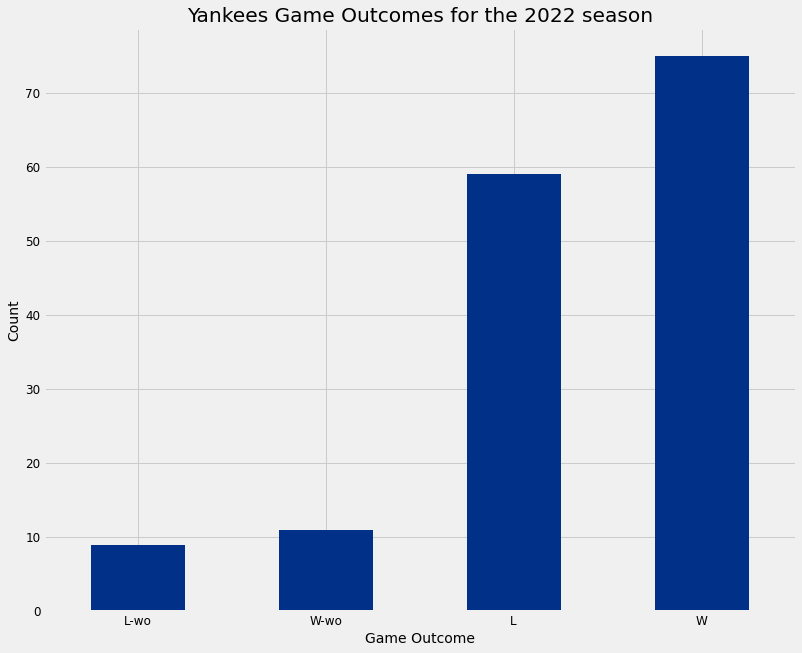

In [0]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
yankees_wl = yankees_wl.sort_values('count')
yankees_wl.plot.bar(title='Yankees Game Outcomes for the 2022 season', fontsize=12, legend = None, color='#003087')
plt.xlabel('Game Outcome', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation = 0)

# Save the plot in the plot dir so that it can be checked in into the repo
plot_fpath = os.path.join(PLOT_DIR, 'yankees_game_outcomes_2022.png')
plt.savefig(plot_fpath)
plt.show()

plt.show()

In [0]:
yankees_wl_comcount = yankees.select('W/L', 'num_comments').groupBy('W/L').sum('num_comments').toPandas().set_index('W/L')
yankees_wl_comcount.columns = ['num_comments']
yankees_wl_comcount = yankees_wl_comcount.sort_values('num_comments')
yankees_wl_comcount

num_comments 
 
 
 W/L 
 
 
 
 
 
 L-wo 
 41193 
 
 
 W-wo 
 50579 
 
 
 L 
 207935 
 
 
 W 
 295769

In [0]:
# save the results to csv
fpath = os.path.join(CSV_DIR, "yankees_wl_comcount.csv")
yankees_wl_comcount.to_csv(fpath)

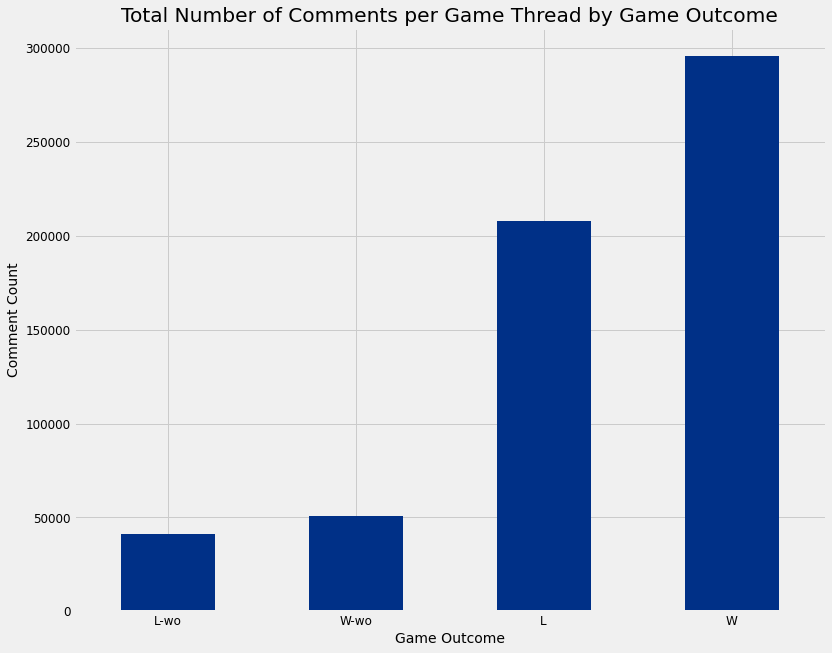

<Figure size 864x720 with 0 Axes>

In [0]:
plt.style.use('fivethirtyeight')
yankees_wl_comcount.plot.bar(title='Total Number of Comments per Game Thread by Game Outcome', fontsize=12, legend = None, color='#003087')
plt.xlabel('Game Outcome', fontsize=14)
plt.ylabel('Comment Count', fontsize=14)
plt.xticks(rotation = 0)
plt.show()

# Save the plot in the plot dir so that it can be checked in into the repo
plot_fpath = os.path.join(PLOT_DIR, 'total_number_of_comments_per_thread.png')
plt.savefig(plot_fpath)
plt.show()

In [0]:
yankees_wl_avgcom = yankees.select('W/L', 'num_comments').groupBy('W/L').avg('num_comments').toPandas().set_index('W/L')
yankees_wl_avgcom.columns = ['avg_comments']
yankees_wl_avgcom = yankees_wl_avgcom.sort_values('avg_comments')
yankees_wl_avgcom

avg_comments 
 
 
 W/L 
 
 
 
 
 
 L 
 3524.322034 
 
 
 W 
 3943.586667 
 
 
 L-wo 
 4577.000000 
 
 
 W-wo 
 4598.090909

In [0]:
# save the results to csv
fpath = os.path.join(CSV_DIR, "yankees_wl_avgcom.csv")
yankees_wl_avgcom.to_csv(fpath)

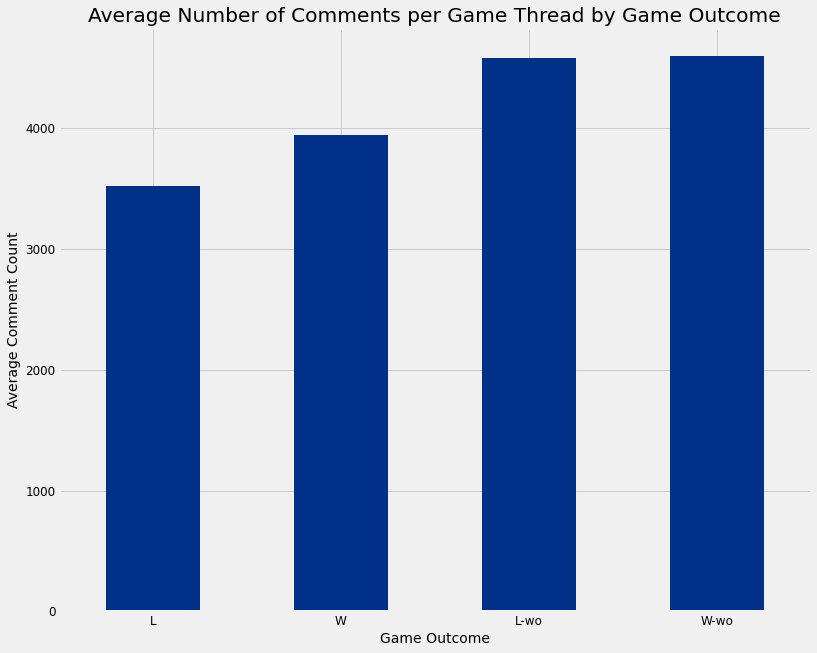

In [0]:
yankees_wl_avgcom.plot.bar(title='Average Number of Comments per Game Thread by Game Outcome', fontsize=12, legend = None, color='#003087')
plt.xlabel('Game Outcome', fontsize=14)
plt.ylabel('Average Comment Count', fontsize=14)
plt.xticks(rotation = 0)

# Save the plot in the plot dir so that it can be checked in into the repo
plot_fpath = os.path.join(PLOT_DIR, 'average_number_of_comments_per_thread.png')
plt.savefig(plot_fpath)

plt.show()


### Read the joined Yankees data in

In [0]:
yankees = spark.read.parquet("/FileStore/yankees_with_external/yankees_with_external.parquet")

In [0]:
yankees.show()

+---+--------------+----------+---+----------+---+---+---+---+----+---+----+---+---+-------+----+----+---+----------+----+------+---------------+-------------------+------------------+------------------+--------+---------+--------------+----------------------+--------------------+---------+----------+------------+-------------------+----------------+---------------------+----------------+-------------+--------------+---------------+-------------+----------+---------+------+------+----------+--------+------+---------+----------------+----------------------+-------+--------+--------------------+---------------+------+-----+--------------------+-------------+------------+--------------+-------------+-------+-----------------------+--------------------+------+---------+--------------------+--------+-----------+---------------------+------------+------------+-----+------------+--------------------+--------------------+-------+--------+---------+------------+--------------+------------------

In [0]:
yankees.count()

Out[132]: 619333

In [0]:
tfidf_df = yankees.select('title','body')

### First, let's look at the length of the comments in our dataset
In this session, the comment length distribution is calculated. (split by space)

In [0]:
from pyspark.sql.functions import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style


In [0]:
tfidf_df=tfidf_df.withColumn("comment_length", size(split(col('body'), ' ')))

In [0]:
tfidf_df.show(10,truncate=False)

+----------------------------------------------------------------------------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+--------------+
|title                                                                       |body                                                                                                                                                                                                                             |comment_length|
+----------------------------------------------------------------------------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+--------------+
|Game Thread: Yankees (5-5) @ Blue Jays 

In [0]:
tfidf_df.filter((col('body') == '[deleted]')).count()

Out[137]: 23848

In [0]:
tfidf_df = tfidf_df.filter(~(col('body') == '[deleted]')).cache()

In [0]:
 tfidf_df.filter((col('body') == '[deleted]')).count()

Out[139]: 0

In [0]:
import os
PLOT_DIR = os.path.join("data", "plots")
CSV_DIR = os.path.join("data", "csv")
os.makedirs(PLOT_DIR, exist_ok=True)
os.makedirs(CSV_DIR, exist_ok=True)

In [0]:
## histogram (by groupby)
hist_comment_length = tfidf_df.groupBy('comment_length').count().toPandas()
hist_comment_length = hist_comment_length.sort_values('comment_length')
hist_comment_length

comment_length 
 count 
 
 
 
 
 47 
 1 
 32393 
 
 
 179 
 2 
 29954 
 
 
 58 
 3 
 39701 
 
 
 101 
 4 
 40546 
 
 
 72 
 5 
 41021 
 
 
 ... 
 ... 
 ... 
 
 
 261 
 522 
 1 
 
 
 76 
 560 
 1 
 
 
 64 
 881 
 2 
 
 
 213 
 958 
 1 
 
 
 83 
 1136 
 1 
 
 
 
 279 rows × 2 columns

In [0]:
hist_comment_length['cum_count'] = hist_comment_length['count'].cumsum()

#### Create a table contains cumulative comments count of every comment length

In [0]:
hist_comment_length

comment_length 
 count 
 cum_count 
 
 
 
 
 47 
 1 
 32393 
 32393 
 
 
 179 
 2 
 29954 
 62347 
 
 
 58 
 3 
 39701 
 102048 
 
 
 101 
 4 
 40546 
 142594 
 
 
 72 
 5 
 41021 
 183615 
 
 
 ... 
 ... 
 ... 
 ... 
 
 
 261 
 522 
 1 
 595480 
 
 
 76 
 560 
 1 
 595481 
 
 
 64 
 881 
 2 
 595483 
 
 
 213 
 958 
 1 
 595484 
 
 
 83 
 1136 
 1 
 595485 
 
 
 
 279 rows × 3 columns

In [0]:
# save the results to csv
fpath = os.path.join(CSV_DIR, "hist_comment_length_yankees.csv")
hist_comment_length.to_csv(fpath)

In [0]:
## 90% cut
comment_length_90 = hist_comment_length.cum_count.iloc[-1]*0.9
x=hist_comment_length.cum_count<comment_length_90
ninty_cut = x.value_counts()
ninty_cut

Out[145]: False    256
True      23
Name: cum_count, dtype: int64

In [0]:
## 90%
hist_comment_length.iloc[ninty_cut.iloc[1]]


Out[146]: comment_length        24
count               5466
cum_count         536935
Name: 139, dtype: int64

In [0]:
hist_comment_length_90 = hist_comment_length.iloc[:ninty_cut.iloc[1]]

In [0]:
hist_comment_length_90.head(10)

comment_length 
 count 
 cum_count 
 
 
 
 
 47 
 1 
 32393 
 32393 
 
 
 179 
 2 
 29954 
 62347 
 
 
 58 
 3 
 39701 
 102048 
 
 
 101 
 4 
 40546 
 142594 
 
 
 72 
 5 
 41021 
 183615 
 
 
 54 
 6 
 39610 
 223225 
 
 
 110 
 7 
 36757 
 259982 
 
 
 104 
 8 
 33528 
 293510 
 
 
 95 
 9 
 31372 
 324882 
 
 
 125 
 10 
 27524 
 352406

<command-1798786091073953>:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.text(x[i],y[i]+1300,y[i], ha = 'center',


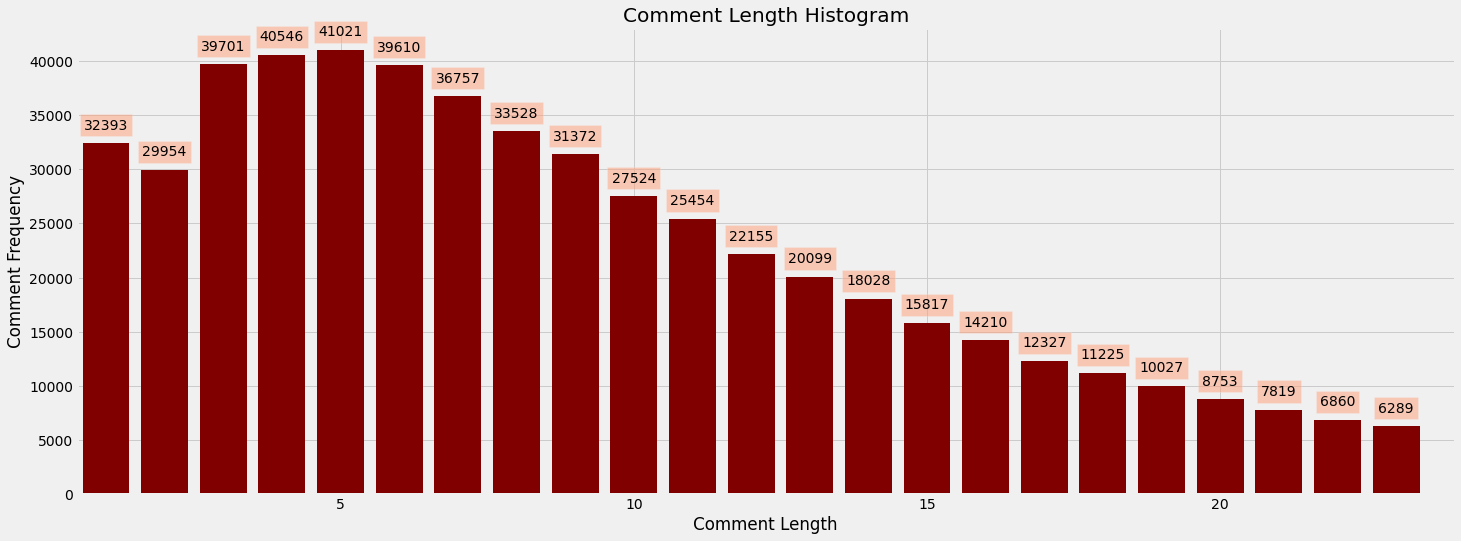

In [0]:
hist_comment_length_90 = hist_comment_length.iloc[:ninty_cut.iloc[1]]

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(x[i],y[i]+1300,y[i], ha = 'center',
                 Bbox = dict(facecolor = 'lightsalmon', alpha = .5))
        
fig = plt.figure(figsize = (22, 8))
plt.style.use('fivethirtyeight')
# creating the bar plot
plt.bar('comment_length', 'count', data=hist_comment_length_90, color='maroon') 
addlabels(hist_comment_length_90['comment_length'].tolist(), hist_comment_length_90['count'].tolist())
plt.title("Comment Length Histogram")
plt.xlabel("Comment Length")
plt.xlim([0.5, 24])
plt.ylabel("Comment Frequency")

## Save the plot in the plot dir so that it can be checked in into the repo
plot_fpath = os.path.join(PLOT_DIR, 'histogram_n_word_comment_yankees.png')
plt.savefig(plot_fpath)

plt.show()

### After calculating and counting the length of each comments, let's build a pipeline to clean our subreddit data to build a wordcloud

#### Build a pipieline for wordcloud

In [0]:
import sparknlp
from sparknlp.base import *
from sparknlp.annotator import *
from pyspark.ml import Pipeline
from pyspark.ml.feature import HashingTF, IDF, StringIndexer, CountVectorizer

In [0]:
#%%time
document_assembler = DocumentAssembler()\
      .setInputCol("body")\
      .setOutputCol("document")
    
tokenizer = Tokenizer()\
      .setInputCols(["document"])\
      .setOutputCol("token")
      
normalizer = Normalizer()\
    .setInputCols(["token"])\
    .setOutputCol("normalized")\
    .setLowercase(True)\
    .setCleanupPatterns(["""[^\w\d\s]"""]) # remove punctuations (keep alphanumeric chars)
# if we don't set CleanupPatterns, it will only keep alphabet letters ([^A-Za-z])

stopwords_cleaner = StopWordsCleaner()\
      .setInputCols("normalized")\
      .setOutputCol("cleanTokens")\
      .setCaseSensitive(False)

finisher = Finisher() \
    .setInputCols(["cleanTokens"]) \
    .setOutputCols(["token_features"]) \
    .setOutputAsArray(True) \
    .setCleanAnnotations(False)# To generate Term Frequency

# convert labels (string) to integers. Easy to process compared to string.
label_stringIdx = StringIndexer(inputCol = "title", outputCol = "label")

nlp_pipeline = Pipeline(stages=[document_assembler, 
            tokenizer,    
            normalizer,
            stopwords_cleaner,
            finisher,
#             hashingTF,
#             idf,
            label_stringIdx])
#             lr,
#             label_to_stringIdx])



#### For the sake of better understanding each word in wordcloud, this wordcloud pipeline did not use stemmer function to lemmatize the words

In [0]:
nlp_model_wordcloud = nlp_pipeline.fit(tfidf_df)

processed_wordcloud = nlp_model_wordcloud.transform(tfidf_df)

In [0]:
words = processed_wordcloud.select('token_features').cache()

In [0]:
words.show(3)

+--------------------+
|      token_features|
+--------------------+
|             [legit]|
|[especially, bc, ...|
|[guess, year, al,...|
+--------------------+
only showing top 3 rows



In [0]:
from pyspark.sql.functions import concat_ws

words = words.withColumn("words", concat_ws(" ", "token_features")).cache()

In [0]:
words_df=words.select('words').toPandas()['words']
words_list=list(words_df)
words_text = ' '.join(words_list)
words_text

Out[156]: 'legit especially bc hes 31 till 39 whatever hes gonna potato whole time really makes team inflexible use dh position doesnt play season bet never guess year al east close maybe even three way sox yanks rays red sox arent actually going good year right shower thinking home run call sterling give odor came odor punches one door realize doesnt sound great loud second half maybe stanton prove stay healthy least half maybe theyre willing try finished last real day tax season finally get sit watch game lets fucking get bread really hope roster paper good right end win window transition period easy comp words sterling bad teams dont know theyre bad yet wouldnt worry pitching great starters able give kind length bullpen fizz second half rate dont think didnt give single rep st entire 6 months 60 games played last year theyre gonna play dog days summer think ship sailed power thor long shot odor 20132016 yankees written mediocre wc best offense legit especially jd martinez bounceback

#### Let's make a wordcloud of all the comments across the total 154 games

In [0]:
!pip install WordCloud

You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-15ffbaaa-a263-4a47-be04-8cdfe9fcec7b/bin/python -m pip install --upgrade pip' command.


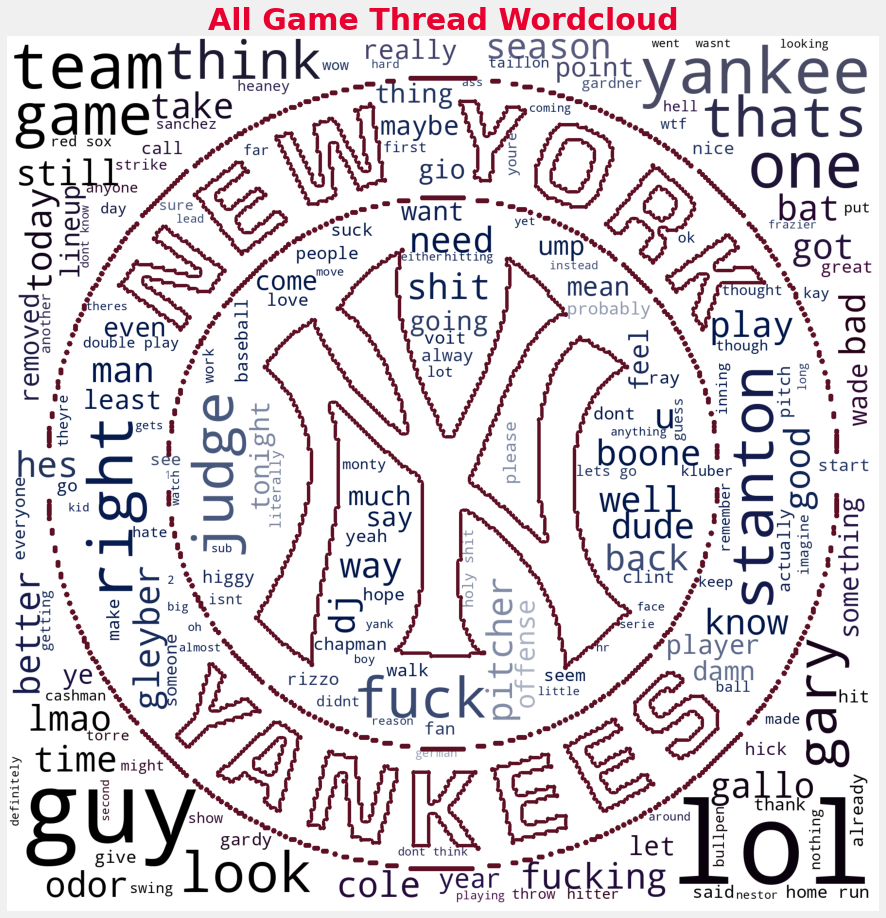

In [0]:
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from PIL import Image
 
#Create the mask
colosseum_mask = np.array(Image.open('image/yankees_logo3.png'))
#Grab the mask colors
colors = ImageColorGenerator(colosseum_mask)
#Filter out stop words
stopwords = set(STOPWORDS)
stopwords.add('deleted')
wordcloud = WordCloud(mask=colosseum_mask,
                      scale=6,
                      include_numbers=True,
                      max_words=10000000,
                      color_func=colors,
                      background_color='white',
                      stopwords=stopwords,
                      collocations=True,
                      contour_color='#5d0f24', #013369
                      contour_width=8,
                      relative_scaling=0.5,
                      min_font_size=4, #colormap='Reds_r'
                      max_font_size=60).generate_from_text(words_text)
plt.figure(figsize=(15,15))
plt.imshow(wordcloud)
plt.axis("off")
plt.title('All Game Thread Wordcloud', x=0.5, y=1, fontweight="bold", color="#E8002F", size=30)

# Save the plot in the plot dir so that it can be checked in into the repo
plot_fpath = os.path.join(PLOT_DIR, 'all_game_thread_wordcloud_yankees.png')
plt.savefig(plot_fpath)
plt.show()

#### Let's visualize the total comments number in each game thread

In [0]:
from pyspark.sql.functions import desc
processed_wordcloud.groupBy("title").count().sort(desc('count')).show(5,truncate=False)

+----------------------------------------------------------------------------------+-----+
|title                                                                             |count|
+----------------------------------------------------------------------------------+-----+
|Game Thread: Yankees (63-51) @ White Sox (67-48) - August 12, 2021 @ 07:00 PM EDT |9528 |
|Game Thread: Astros (15-13) @ Yankees (14-14) - May 04, 2021 @ 07:05 PM EDT       |9168 |
|Game Thread: Yankees (61-50) @ Royals (48-62) - August 09, 2021 @ 08:10 PM EDT    |8911 |
|Game Thread: Yankees (88-67) @ Red Sox (88-67) - September 26, 2021 @ 07:08 PM EDT|8536 |
|Game Thread: Astros (15-14) @ Yankees (15-14) - May 05, 2021 @ 07:05 PM EDT       |7292 |
+----------------------------------------------------------------------------------+-----+
only showing top 5 rows



In [0]:
comment_count = processed_wordcloud.groupBy("title").count().sort(desc('count')).cache().toPandas()
comment_count.head(5)

title 
 count 
 
 
 
 
 0 
 Game Thread: Yankees (63-51) @ White Sox (67-4... 
 9528 
 
 
 1 
 Game Thread: Astros (15-13) @ Yankees (14-14) ... 
 9168 
 
 
 2 
 Game Thread: Yankees (61-50) @ Royals (48-62) ... 
 8911 
 
 
 3 
 Game Thread: Yankees (88-67) @ Red Sox (88-67)... 
 8536 
 
 
 4 
 Game Thread: Astros (15-14) @ Yankees (15-14) ... 
 7292

In [0]:
# save the results to csv
fpath = os.path.join(CSV_DIR, "all_game_thread_comments_count_yankees.csv")
comment_count.to_csv(fpath)

#### Let's choose top 20 games to visualize since we have 154 games in total

<command-1798786091073971>:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.text(y[i]+350, x[i],y[i], ha = 'center',


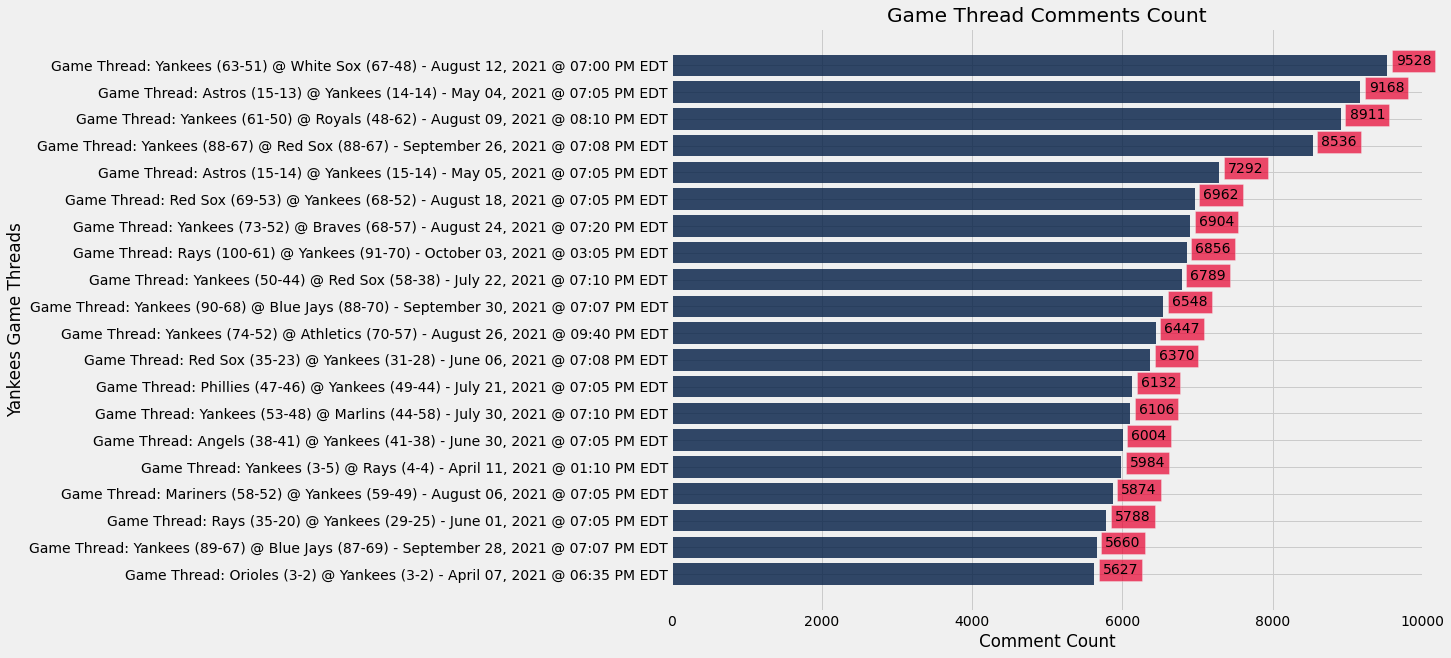

In [0]:
import matplotlib.pyplot as plt
from matplotlib import style
        
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(y[i]+350, x[i],y[i], ha = 'center',
                 Bbox = dict(facecolor = '#E8002F', alpha = .7))
# Using the style for the plot
fig, ax = plt.subplots()
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = [12, 10]
plt.barh('title','count', data=comment_count[:20], color='#001C43',alpha=0.8)
addlabels(comment_count[:20]['title'], comment_count[:20]['count'])
plt.ylabel("Yankees Game Threads")
plt.xlabel("Comment Count")
plt.title('Game Thread Comments Count')

# Save the plot in the plot dir so that it can be checked in into the repo
plot_fpath = os.path.join(PLOT_DIR, 'game_thread_comments_count_yankees.png')
plt.savefig(plot_fpath)
ax.invert_yaxis()
plt.show()


#### Since Yankees and White Sox's game had the highest amount of comments, let's make the wordcloud for that game

In [0]:
Yankees_WhiteSox = processed_wordcloud.filter(col('title')=='Game Thread: Yankees (63-51) @ White Sox (67-48) - August 12, 2021 @ 07:00 PM EDT').cache()

In [0]:
Yankees_WhiteSox.select('title','token_features').show(5, truncate=False)

+---------------------------------------------------------------------------------+-------------------------------------------------------------------------------+
|title                                                                            |token_features                                                                 |
+---------------------------------------------------------------------------------+-------------------------------------------------------------------------------+
|Game Thread: Yankees (63-51) @ White Sox (67-48) - August 12, 2021 @ 07:00 PM EDT|[go, troll, somewhere, else]                                                   |
|Game Thread: Yankees (63-51) @ White Sox (67-48) - August 12, 2021 @ 07:00 PM EDT|[natural, favorite, baseball, movie]                                           |
|Game Thread: Yankees (63-51) @ White Sox (67-48) - August 12, 2021 @ 07:00 PM EDT|[worst, pitchers, sent, bull, pen]                                             |
|Game Thread: Ya

In [0]:
words_Yankees_WhiteSox = Yankees_WhiteSox.select('token_features').cache()

In [0]:
words_Yankees_WhiteSox.show(5)

+--------------------+
|      token_features|
+--------------------+
|[go, troll, somew...|
|[natural, favorit...|
|[worst, pitchers,...|
|[sandlot, probabl...|
|[maybe, already, ...|
+--------------------+
only showing top 5 rows



In [0]:
from pyspark.sql.functions import concat_ws

words_Yankees_WhiteSox = words_Yankees_WhiteSox.withColumn("words", concat_ws(" ", "token_features")).cache()

In [0]:
words_df_YW = words_Yankees_WhiteSox.select('words').toPandas()['words']
words_list_YW = list(words_df_YW)
words_text_YW = ' '.join(words_list_YW)
words_text_YW

Out[168]: 'go troll somewhere else natural favorite baseball movie worst pitchers sent bull pen sandlot probably second favorite though love movies yankees bad guys maybe already staring point shaking c 61 heaney made 1 mistake proceeds list several mistakes everyone dressed like 1940s smh another yankee short porch hr ever get real stadium build even ellsbury come gardy going yardy confirms 100 juiced balls old school field dreams shit papi smooth motherfucker analytics says hes supposed good gotten bottom positive steroid test brett gardners son goes daughters school came career day stayed day talk kids sign autographs happened science day intoxicated pe teacher poked head classroom yelled fucking nerds brett without saying word grabbed one aborted snakes kids dissecting headed door watched classroom window beat guys ass daughter go yankees games makes hissing noise every time gets hit kinda agree seems gimmick hopefully wont distraction team jesus smoltz say something good yankees w

In [0]:
!pip install WordCloud

You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-15ffbaaa-a263-4a47-be04-8cdfe9fcec7b/bin/python -m pip install --upgrade pip' command.


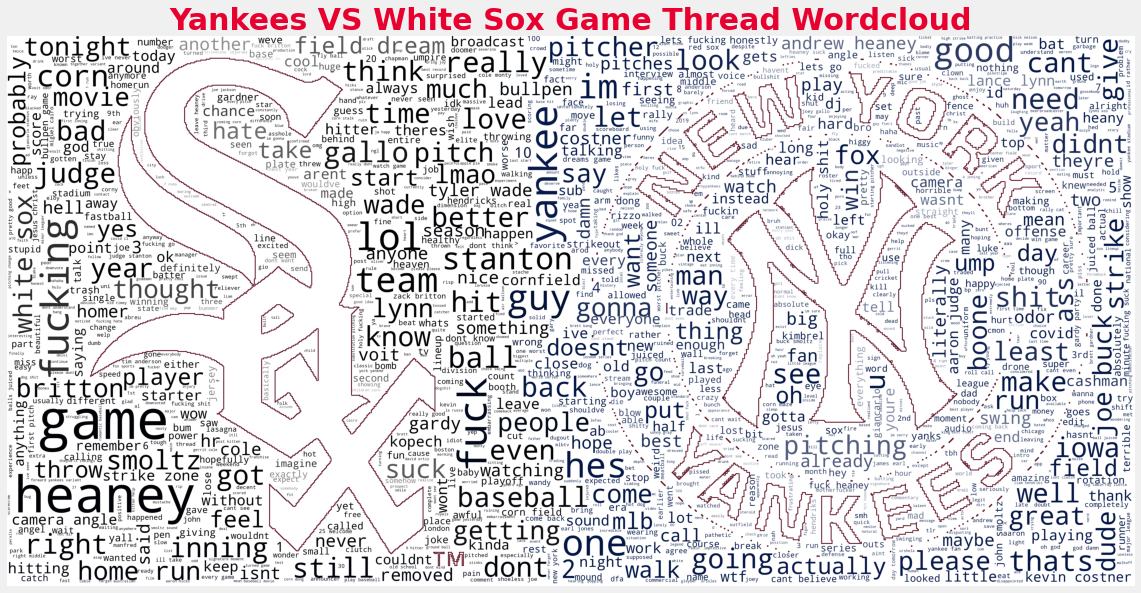

In [0]:
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from PIL import Image
 
#Create the mask
colosseum_mask = np.array(Image.open('image/Yankees_WhiteSox8.png'))
#Grab the mask colors
colors = ImageColorGenerator(colosseum_mask)
#Filter out stop words
stopwords = set(STOPWORDS)
wordcloud = WordCloud(mask=colosseum_mask,
                      scale=6,
                      include_numbers=True,
                      max_words=10000000,
                      color_func=colors,
                      background_color='white',
                      stopwords=stopwords,
                      collocations=True,
                      contour_color='#5d0f24', #013369
                      contour_width=7,
                      relative_scaling=0.5,
                      min_font_size=4, #colormap='Reds_r'
                      max_font_size=60).generate_from_text(words_text_YW)
plt.figure(figsize=(18,15))
plt.imshow(wordcloud)
plt.axis("off")
plt.title('Yankees VS White Sox Game Thread Wordcloud', x=0.5, y=1, fontweight="bold", color="#E8002F", size=30)

# Save the plot in the plot dir so that it can be checked in into the repo
plot_fpath = os.path.join(PLOT_DIR, 'yankees_whitesox_game_thread_wordcloud.png')
plt.savefig(plot_fpath)
ax.invert_yaxis()
plt.show()

### Now let's use our pipeline again with stemmer function to calculate TF-IDF of each word

In [0]:
# spark = SparkSession\
#         .builder\
#         .appName("TfIdf_Example")\
#         .getOrCreate()

In [0]:
import sparknlp
from sparknlp.base import *
from sparknlp.annotator import *
from pyspark.ml import Pipeline
from pyspark.ml.feature import HashingTF, IDF, StringIndexer, CountVectorizer

In [0]:
document_assembler = DocumentAssembler()\
      .setInputCol("body")\
      .setOutputCol("document")
    
tokenizer = Tokenizer()\
      .setInputCols(["document"])\
      .setOutputCol("token")
      
normalizer = Normalizer()\
    .setInputCols(["token"])\
    .setOutputCol("normalized")\
    .setLowercase(True)\
    .setCleanupPatterns(["""[^\w\d\s]"""]) # remove punctuations (keep alphanumeric chars)
# if we don't set CleanupPatterns, it will only keep alphabet letters ([^A-Za-z])

stopwords_cleaner = StopWordsCleaner()\
      .setInputCols("normalized")\
      .setOutputCol("cleanTokens")\
      .setCaseSensitive(False)

stemmer = Stemmer()\
      .setInputCols(["cleanTokens"])\
      .setOutputCol("stem")

finisher = Finisher() \
    .setInputCols(["stem"]) \
    .setOutputCols(["token_features"]) \
    .setOutputAsArray(True) \
    .setCleanAnnotations(False)

# # To generate Term Frequency
# hashingTF = HashingTF(inputCol="token_features", outputCol="TF", numFeatures=1000)

# # To generate Inverse Document Frequency
# idf = IDF(inputCol="TF", outputCol="IDF", minDocFreq=5)

# convert labels (string) to integers. Easy to process compared to string.
label_stringIdx = StringIndexer(inputCol = "title", outputCol = "label")


# countVectors = CountVectorizer(inputCol="token_features", outputCol="features", vocabSize=10000, minDF=5)

# label_stringIdx = StringIndexer(inputCol = "features", outputCol = "label")

nlp_pipeline = Pipeline(stages=[document_assembler, 
            tokenizer,    
            normalizer,
            stopwords_cleaner,
            stemmer, 
            finisher,
#             hashingTF,
#             idf,
            label_stringIdx])
#             lr,
#             label_to_stringIdx])

nlp_model = nlp_pipeline.fit(tfidf_df)

processed = nlp_model.transform(tfidf_df)

processed.count()

Out[173]: 595485

In [0]:
processed.show()

+--------------------+--------------------+--------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+-----+
|               title|                body|comment_length|            document|               token|          normalized|         cleanTokens|                stem|      token_features|label|
+--------------------+--------------------+--------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+-----+
|Game Thread: Yank...|              Legit.|             1|[{document, 0, 5,...|[{token, 0, 4, Le...|[{token, 0, 4, le...|[{token, 0, 4, le...|[{token, 0, 4, le...|             [legit]| 72.0|
|Game Thread: Yank...|especially bc hes...|            47|[{document, 0, 22...|[{token, 0, 9, es...|[{token, 0, 9, es...|[{token, 0, 9, es...|[{token, 0, 9, es...|[especi, bc, he, ...| 72.0|
|Game Thread: Yank...|Guess this year t...|  

In [0]:
clean_terms = processed.select('title','token_features')
clean_terms.show()

+--------------------+--------------------+
|               title|      token_features|
+--------------------+--------------------+
|Game Thread: Yank...|             [legit]|
|Game Thread: Yank...|[especi, bc, he, ...|
|Game Thread: Yank...|[guess, year, al,...|
|Game Thread: Yank...|[red, sox, arent,...|
|Game Thread: Yank...|[shower, think, h...|
|Game Thread: Yank...|[second, half, ma...|
|Game Thread: Yank...|[finish, last, re...|
|Game Thread: Yank...|[realli, hope, ro...|
|Game Thread: Yank...|[right, end, win,...|
|Game Thread: Yank...|[word, sterl, bad...|
|Game Thread: Yank...|[pitch, great, st...|
|Game Thread: Yank...|[dont, think, did...|
|Game Thread: Yank...|[power, thor, lon...|
|Game Thread: Yank...|[20132016, yanke,...|
|Game Thread: Yank...|[offens, legit, e...|
|Game Thread: Yank...|[see, 7882, win, ...|
|Game Thread: Yank...|[odor, hit, sixth...|
|Game Thread: Yank...|[swear, cashman, ...|
|Game Thread: Yank...|[red, sox, roster...|
|Game Thread: Yank...|[stanton, 

In [0]:
clean_terms_rdd = clean_terms.rdd

In [0]:
clean_terms_rdd.take(5)

Out[177]: [Row(title='Game Thread: Yankees (5-5) @ Blue Jays (4-6) - April 13, 2021 @ 07:07 PM EDT', token_features=['legit']),
 Row(title='Game Thread: Yankees (5-5) @ Blue Jays (4-6) - April 13, 2021 @ 07:07 PM EDT', token_features=['especi', 'bc', 'he', '31', 'till', '39', 'whatev', 'he', 'gonna', 'potato', 'whole', 'time', 'realli', 'make', 'team', 'inflex', 'us', 'dh', 'posit', 'doesnt', 'plai', 'season', 'bet', 'never']),
 Row(title='Game Thread: Yankees (5-5) @ Blue Jays (4-6) - April 13, 2021 @ 07:07 PM EDT', token_features=['guess', 'year', 'al', 'east', 'close', 'mayb', 'even', 'three', 'wai', 'sox', 'yank', 'rai']),
 Row(title='Game Thread: Yankees (5-5) @ Blue Jays (4-6) - April 13, 2021 @ 07:07 PM EDT', token_features=['red', 'sox', 'arent', 'actual', 'go', 'good', 'year', 'right']),
 Row(title='Game Thread: Yankees (5-5) @ Blue Jays (4-6) - April 13, 2021 @ 07:07 PM EDT', token_features=['shower', 'think', 'home', 'run', 'call', 'sterl', 'give', 'odor', 'came', 'odor', 'p

#### Here we calculate TF-IDF for each word and document

In [0]:
import math
from pyspark.sql.functions import *

map1=clean_terms_rdd.flatMap(lambda x: [((x[0],i),1) for i in x[1]])
reduce=map1.reduceByKey(lambda x,y:x+y)
tf=reduce.map(lambda x: (x[0][1],(x[0][0],x[1])))
map3=reduce.map(lambda x: (x[0][1],(x[0][0],x[1],1)))
map4=map3.map(lambda x:(x[0],x[1][2]))
reduce2=map4.reduceByKey(lambda x,y:x+y)
idf=reduce2.map(lambda x: (x[0],math.log10(7511/x[1])))
rdd=tf.join(idf)
rdd=rdd.map(lambda x: (x[1][0][0],(x[0],x[1][0][1],x[1][1],x[1][0][1]*x[1][1]))).sortByKey()
rdd=rdd.map(lambda x: (x[0],x[1][0],x[1][1],x[1][2],x[1][3]))
rdd.toDF(["title","Token","TF","IDF","TF-IDF"]).show()

+--------------------+-------+---+------------------+------------------+
|               title|  Token| TF|               IDF|            TF-IDF|
+--------------------+-------+---+------------------+------------------+
|Game Thread: Ange...|    lot| 30| 1.688177041143745|50.645311234312345|
|Game Thread: Ange...|  thing| 52|1.6910063311626091| 87.93232922045567|
|Game Thread: Ange...| almost| 15|1.6910063311626091|25.365094967439138|
|Game Thread: Ange...|  minor|  7|1.7025114935679337|11.917580454975536|
|Game Thread: Ange...|    lol|123|1.6910063311626091| 207.9937787330009|
|Game Thread: Ange...|   yank| 14|1.6910063311626091| 23.67408863627653|
|Game Thread: Ange...|  might| 28|1.6910063311626091| 47.34817727255306|
|Game Thread: Ange...| return|  1|1.6996065029245266|1.6996065029245266|
|Game Thread: Ange...|    arm| 13|1.6910063311626091|21.983082305113918|
|Game Thread: Ange...|   youd|  6|1.6996065029245266| 10.19763901754716|
|Game Thread: Ange...|   keep| 32|1.691006331162609

In [0]:
tfidf_rdd_df = rdd.toDF(["title","Token","TF","IDF","TF-IDF"])

In [0]:
tfidf_rdd_df.show()

+--------------------+---------+---+------------------+------------------+
|               title|    Token| TF|               IDF|            TF-IDF|
+--------------------+---------+---+------------------+------------------+
|Game Thread: Ange...|      let| 54|1.6910063311626091|  91.3143418827809|
|Game Thread: Ange...|     like|244|1.6910063311626091|412.60554480367665|
|Game Thread: Ange...|   period|  5| 1.755123830774358|  8.77561915387179|
|Game Thread: Ange...|     work| 41|1.6910063311626091| 69.33125957766697|
|Game Thread: Ange...|       im|147| 1.688177041143745| 248.1620250481305|
|Game Thread: Ange...|sheffield|  1|2.2736377706522455|2.2736377706522455|
|Game Thread: Ange...|     good|135| 1.688177041143745|227.90390055440557|
|Game Thread: Ange...|    start| 69| 1.688177041143745| 116.4842158389184|
|Game Thread: Ange...|     boon| 64|1.6910063311626091|108.22440519440698|
|Game Thread: Ange...|     wear|  4|1.6910063311626091|6.7640253246504365|
|Game Thread: Ange...|  n

In [0]:
from pyspark.sql.window import Window
from pyspark.sql.functions import col, row_number
windowDept = Window.partitionBy("title").orderBy(col("TF-IDF").desc())
ranked_tfidf=tfidf_rdd_df.withColumn("rank",row_number().over(windowDept))
ranked_tfidf.filter(col('rank').isin([1,2,3,4,5])).show(truncate=False)

+------------------------------------------------------------------------------------+------+---+------------------+------------------+----+
|title                                                                               |Token |TF |IDF               |TF-IDF            |rank|
+------------------------------------------------------------------------------------+------+---+------------------+------------------+----+
|Game Thread: Athletics (44-27) @ Yankees (36-33) - June 19, 2021 @ 01:05 PM EDT     |fuck  |308|1.6910063311626091|520.8299499980836 |1   |
|Game Thread: Athletics (44-27) @ Yankees (36-33) - June 19, 2021 @ 01:05 PM EDT     |like  |185|1.6910063311626091|312.83617126508267|2   |
|Game Thread: Athletics (44-27) @ Yankees (36-33) - June 19, 2021 @ 01:05 PM EDT     |hit   |172|1.688177041143745 |290.3664510767241 |3   |
|Game Thread: Athletics (44-27) @ Yankees (36-33) - June 19, 2021 @ 01:05 PM EDT     |get   |169|1.688177041143745 |285.3019199532929 |4   |
|Game Thread:

In [0]:
# save the results to csv
top5_tfidfpd = ranked_tfidf.filter(col('rank').isin([1,2,3,4,5])).toPandas()
fpath = os.path.join(CSV_DIR, "top5_tfidfpd.csv")
top5_tfidfpd.to_csv(fpath)

#### Add Yankees VS White Sox label back to filtered TF-IDF dataframe

In [0]:
yankees_whitesox_tfidf = ranked_tfidf.filter(col('title')=='Game Thread: Yankees (63-51) @ White Sox (67-48) - August 12, 2021 @ 07:00 PM EDT')

In [0]:
yankees_whitesox_tfidf.show(5)

+--------------------+------+---+------------------+------------------+----+
|               title| Token| TF|               IDF|            TF-IDF|rank|
+--------------------+------+---+------------------+------------------+----+
|Game Thread: Yank...|heanei|779|2.1275097349740073|1657.3300835447517|   1|
|Game Thread: Yank...|  fuck|922|1.6910063311626091|1559.1078373319256|   2|
|Game Thread: Yank...|  game|906| 1.688177041143745| 1529.488399276233|   3|
|Game Thread: Yank...|  like|588|1.6910063311626091| 994.3117227236141|   4|
|Game Thread: Yank...|   get|531| 1.688177041143745| 896.4220088473286|   5|
+--------------------+------+---+------------------+------------------+----+
only showing top 5 rows



### Create dummy variables using regex based on the results of word cloud and TF-IDF

The results of word cloud shows the wrods with high frequency in all the comments. TF-IDF indicates the most important words for each game. Combining these two results, we found two players, Gary Sanchez (Kraken) and Aaron Judge (All Rise), are the potentially most mentioned players in Yankees games. Here, we added two dummy variables to indicate whether a comment mentioned them.

In [0]:
##player names for regex 
regex_player_names = [
    'Aaron Judge', 'Judge', 'All Rise', 
    #'Giancarlo Stanton', 'Stanton', 
    'Gary Sanchez', 'Sanchez', 'The Kraken', 'Kraken',
    #'Andrew Heaney', 'Heaney'
]
#two variables: has_aaron_judge, has_gary_sanchez


In [0]:
## Aaron Judge
yankees = yankees.withColumn('has_aaron_judge',col('body').rlike('(?i)Aaron Judge|(?i)Judge|(?i)All Rise'))


In [0]:
## Gary Sanchez
yankees = yankees.withColumn('has_gary_sanchez',col('body').rlike('(?i)Gary Sanchez|(?i)\
                                  Sanchez|(?i)Kraken'))

In [0]:
## summary table of the players
## Aaron Judge
yankees.groupBy('has_aaron_judge').count().show()

+---------------+------+
|has_aaron_judge| count|
+---------------+------+
|           true| 14524|
|          false|604809|
+---------------+------+



In [0]:
# save the results to csv
aaron_judge_count = yankees.groupBy('has_aaron_judge').count()
fpath = os.path.join(CSV_DIR, "aaron_judge_count.csv")
aaron_judge_count.toPandas().to_csv(fpath)

In [0]:
dbutils.fs.rm("/politic_submission.parquet", True)

Out[190]: False

In [0]:
## summary table of the players
## Gary Sanchez
yankees.groupBy('has_gary_sanchez').count().show()

+----------------+------+
|has_gary_sanchez| count|
+----------------+------+
|            true|  1046|
|           false|618287|
+----------------+------+



In [0]:
# save the results to csv
gary_sanchez_count = yankees.groupBy('has_gary_sanchez').count()
fpath = os.path.join(CSV_DIR, "gary_sanchez_count.csv")
gary_sanchez_count.toPandas().to_csv(fpath)

In [0]:
## cross comparison?
yankees.groupBy('has_aaron_judge','has_gary_sanchez').count().show()

+---------------+----------------+------+
|has_aaron_judge|has_gary_sanchez| count|
+---------------+----------------+------+
|           true|           false| 14488|
|           true|            true|    36|
|          false|           false|603799|
|          false|            true|  1010|
+---------------+----------------+------+



In [0]:
# save the results to csv
judge_sanchez_count = yankees.groupBy('has_aaron_judge','has_gary_sanchez').count()
fpath = os.path.join(CSV_DIR, "judge_sanchez_count.csv")
judge_sanchez_count.toPandas().to_csv(fpath)